# Importing

In [1]:
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import numpy as np

sns.get_dataset_names()


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [2]:
df=sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# EDA

In [3]:

df.shape

(344, 7)

In [4]:
df.size

2408

In [5]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [6]:
df.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


# Preprocessing 

In [7]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [8]:
a=df['bill_length_mm'].mean()
df['bill_length_mm']=df['bill_length_mm'].replace(np.nan,a)

In [9]:
b=df['bill_depth_mm'].mean()
df['bill_depth_mm']=df['bill_depth_mm'].replace(np.nan,b)

In [10]:
c=df['flipper_length_mm'].mean()
df['flipper_length_mm']=df['flipper_length_mm'].replace(np.nan,c)

In [11]:
d=df['body_mass_g'].mean()
df['body_mass_g']=df['body_mass_g'].replace(np.nan,d)

In [12]:
df.sex.value_counts()

Male      168
Female    165
Name: sex, dtype: int64

In [13]:
df['sex'].fillna('no gender',inplace=True)


In [14]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [15]:
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [16]:
from sklearn.preprocessing import LabelEncoder
a=LabelEncoder()
b=['species','island','sex']
for i in b:
    df[i]=a.fit_transform(df[i])

# Correlation

In [17]:
df.corr()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,1.000000,-0.635659,0.728674,-0.741335,0.851160,0.747726,0.008559
island,-0.635659,1.000000,-0.351461,0.567506,-0.562328,-0.558045,0.029246
bill_length_mm,0.728674,-0.351461,1.000000,-0.235053,0.656181,0.595110,0.266041
bill_depth_mm,-0.741335,0.567506,-0.235053,1.000000,-0.583851,-0.471916,0.305265
flipper_length_mm,0.851160,-0.562328,0.656181,-0.583851,1.000000,0.871202,0.211696
body_mass_g,0.747726,-0.558045,0.595110,-0.471916,0.871202,1.000000,0.354040
sex,0.008559,0.029246,0.266041,0.305265,0.211696,0.354040,1.000000


<Axes: >

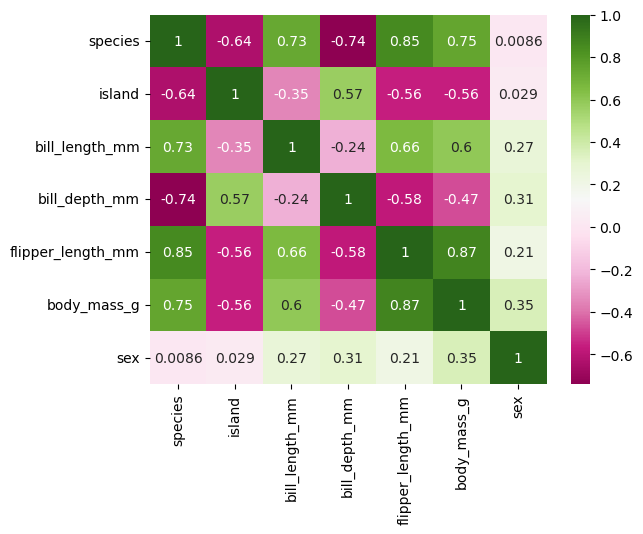

In [18]:
sns.heatmap(df.corr(),annot=True,cmap='PiYG')

# Dropping columns

In [19]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10000,18.70000,181.000000,3750.000000,1
1,0,2,39.50000,17.40000,186.000000,3800.000000,0
2,0,2,40.30000,18.00000,195.000000,3250.000000,0
3,0,2,43.92193,17.15117,200.915205,4201.754386,2
4,0,2,36.70000,19.30000,193.000000,3450.000000,0
...,...,...,...,...,...,...,...
339,2,0,43.92193,17.15117,200.915205,4201.754386,2
340,2,0,46.80000,14.30000,215.000000,4850.000000,0
341,2,0,50.40000,15.70000,222.000000,5750.000000,1
342,2,0,45.20000,14.80000,212.000000,5200.000000,0


In [20]:
x=df.drop('species',axis=1)
x

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.10000,18.70000,181.000000,3750.000000,1
1,2,39.50000,17.40000,186.000000,3800.000000,0
2,2,40.30000,18.00000,195.000000,3250.000000,0
3,2,43.92193,17.15117,200.915205,4201.754386,2
4,2,36.70000,19.30000,193.000000,3450.000000,0
...,...,...,...,...,...,...
339,0,43.92193,17.15117,200.915205,4201.754386,2
340,0,46.80000,14.30000,215.000000,4850.000000,0
341,0,50.40000,15.70000,222.000000,5750.000000,1
342,0,45.20000,14.80000,212.000000,5200.000000,0


In [21]:
y=df['species']
y

0      0
1      0
2      0
3      0
4      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: species, Length: 344, dtype: int64

# Logistic Regression

In [22]:
from sklearn.model_selection import train_test_split


In [23]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)


In [24]:
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(275, 6) (275,) (69, 6) (69,)


In [25]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [26]:
p=model.predict(xtest)
p

array([1, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0,
       2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 1, 0, 1, 1, 2, 1, 0, 2, 0, 2, 1,
       0, 0, 0])

In [27]:
from sklearn.metrics import accuracy_score
q=accuracy_score(ytest,p)*100
q

98.55072463768117

In [28]:
p1=model.predict(xtrain)
p1

array([0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 1, 1, 0, 0, 2, 0, 1,
       2, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 0, 2, 0, 0,
       1, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 1, 0, 2, 2, 2, 1,
       0, 0, 2, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 1, 2, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 1, 0, 2,
       1, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 1, 2, 0,
       2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 2, 0, 0, 2, 1, 1, 0, 0,
       0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 2, 0, 0, 2, 0, 2, 1, 2, 0, 2, 2, 1, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 2,
       0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2, 0, 2, 2, 2, 0,
       0, 1, 1, 2, 1, 1, 0, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 0, 0, 0, 0,
       0, 2, 1, 0, 2, 0, 1, 0, 0, 2, 0])

In [29]:
q1=accuracy_score(ytrain,p1)*100
q1                                             #generalized accuracy

97.81818181818181

# Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier()          #NO critera therefore it willbe taking gini index
a=model1.fit(xtrain,ytrain)
a

DecisionTreeClassifier()

In [31]:
p=model.predict(xtrain)
p

array([0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 1, 1, 0, 0, 2, 0, 1,
       2, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 0, 2, 0, 0,
       1, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 1, 0, 2, 2, 2, 1,
       0, 0, 2, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 1, 2, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 1, 0, 2,
       1, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 1, 2, 0,
       2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 2, 0, 0, 2, 1, 1, 0, 0,
       0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 2, 0, 0, 2, 0, 2, 1, 2, 0, 2, 2, 1, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 2,
       0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2, 0, 2, 2, 2, 0,
       0, 1, 1, 2, 1, 1, 0, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 0, 0, 0, 0,
       0, 2, 1, 0, 2, 0, 1, 0, 0, 2, 0])

In [32]:
q=accuracy_score(ytrain,p)*100
q

97.81818181818181

In [33]:
p1=model.predict(xtest)
p1

array([1, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0,
       2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 1, 0, 1, 1, 2, 1, 0, 2, 0, 2, 1,
       0, 0, 0])

In [34]:
q1=accuracy_score(ytest,p1)*100
q1

98.55072463768117

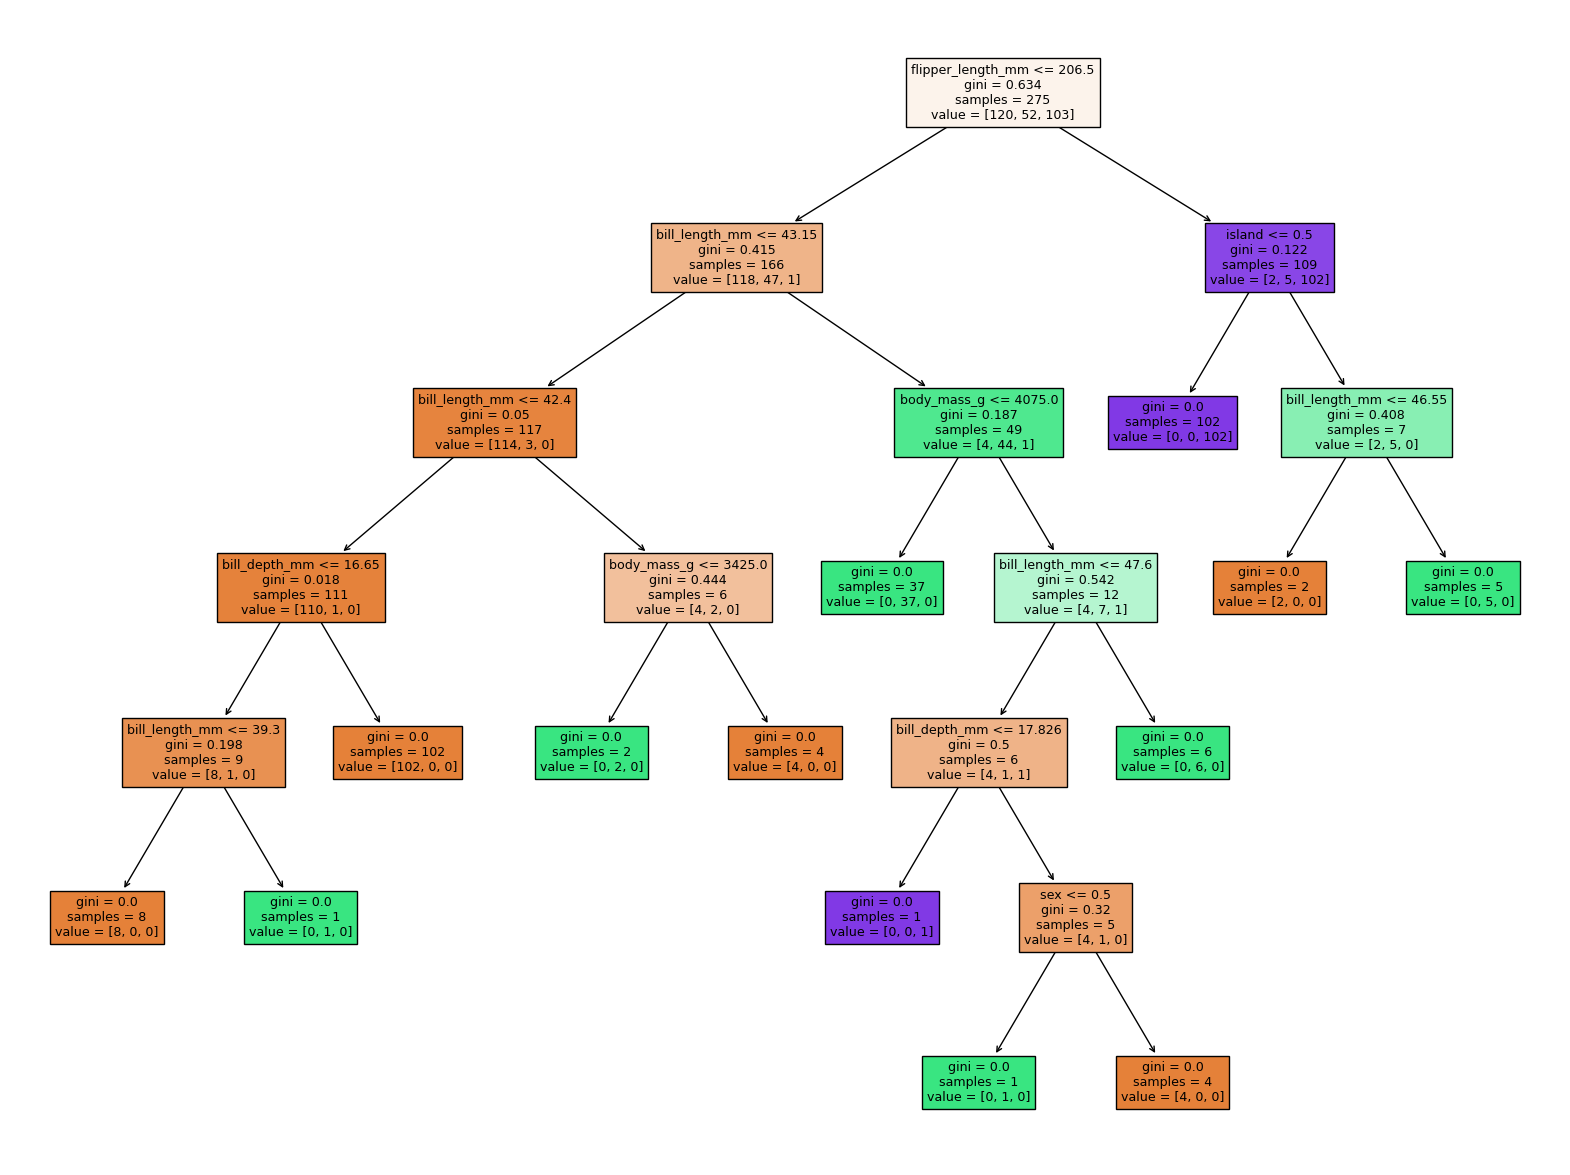

In [35]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,15))
tree.plot_tree(model1,feature_names=x.columns,filled=True)
plt.show()

# Random Forest Classifer

In [36]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()
model2.fit(xtrain,ytrain)

RandomForestClassifier()

In [37]:
p=model2.predict(xtrain)
p

array([0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 1, 1, 0, 0, 2, 0, 1,
       2, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 0, 2, 0, 0,
       1, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 1,
       0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 1, 2, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2,
       1, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 1, 2, 0,
       2, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 2, 1, 1, 0, 0,
       0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 2, 0, 0, 2, 0, 2, 1, 2, 0, 2, 2, 1, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 2,
       0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2, 0, 2, 2, 2, 0,
       0, 1, 1, 2, 1, 1, 0, 0, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 0, 0, 0, 0,
       0, 2, 1, 0, 2, 0, 1, 0, 0, 2, 0])

In [38]:
q=accuracy_score(ytrain,p)*100
q

100.0

In [39]:
p1=model2.predict(xtest)
p1

array([1, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0,
       2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 1, 0, 1, 1, 2, 1, 0, 2, 0, 2, 1,
       0, 0, 0])

In [40]:
q1=accuracy_score(ytest,p1)*100
q1

100.0

# Support Vector Classifier

In [41]:
from sklearn.svm import SVC
model3=SVC()
model3.fit(xtrain,ytrain)

SVC()

In [42]:
p=model3.predict(xtrain)
p

array([0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0,
       2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2,
       2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2,
       0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0])

In [43]:
q=accuracy_score(ytrain,p)*100
q

74.54545454545455

In [44]:
p1=model3.predict(xtest)
p1

array([0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0,
       0, 0, 0])

In [45]:
q1=accuracy_score(ytest,p1)*100
q1

68.11594202898551

# KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
model4=KNeighborsClassifier()
model4.fit(xtrain,ytrain)

KNeighborsClassifier()

In [47]:
p=model4.predict(xtrain)
p

array([0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 1, 1,
       2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 0, 2, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2,
       1, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 1, 1, 0, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 2, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 0, 2,
       0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2, 0, 2, 2, 2, 0,
       0, 0, 2, 2, 0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0,
       0, 2, 1, 0, 2, 0, 1, 0, 0, 2, 0])

In [48]:
q=accuracy_score(ytrain,p)*100
q

84.0

In [49]:
p1=model4.predict(xtest)
p1

array([0, 0, 2, 0, 2, 2, 2, 1, 0, 0, 2, 0, 0, 0, 2, 1, 0, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 1, 1, 0, 2, 2, 2, 0,
       2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 2, 2, 0,
       0, 0, 0])

In [50]:
q1=accuracy_score(ytest,p1)*100
q1

68.11594202898551

# Navie Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB
model5=GaussianNB()
model5.fit(xtrain,ytrain)

GaussianNB()

In [52]:
p=model5.predict(xtrain)
p

array([0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 1, 1, 0, 0, 2, 0, 1,
       2, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 0, 2, 0, 0,
       1, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 1,
       0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 1, 2, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2,
       1, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 1, 2, 0,
       2, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1, 2, 1, 1, 0, 1,
       0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 2, 0, 0, 2, 0, 2, 1, 2, 0, 2, 2, 1, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2,
       0, 0, 0, 1, 0, 1, 0, 2, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 2, 2, 2, 0,
       0, 1, 1, 2, 1, 1, 0, 0, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 1,
       0, 2, 1, 0, 2, 0, 1, 0, 0, 2, 0])

In [53]:
q=accuracy_score(ytrain,p)*100
q

96.72727272727273

In [54]:
p1=model5.predict(xtest)
p1

array([1, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 0,
       2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 1, 0, 1, 1, 2, 1, 0, 2, 0, 2, 0,
       0, 0, 0])

In [55]:
q1=accuracy_score(ytest,p1)*100
q1


97.10144927536231

In [56]:
from sklearn.naive_bayes import MultinomialNB
model6=MultinomialNB()                                              #MultinomialNB
model6.fit(xtrain,ytrain)

MultinomialNB()

In [57]:
p=model6.predict(xtest)
p

array([1, 0, 2, 1, 2, 2, 2, 0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 2, 0, 2, 0, 0, 1, 2, 2, 2, 0,
       0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 0, 1, 0, 1, 1, 2, 0, 2, 2, 2, 2, 0,
       0, 0, 0])

In [58]:
q=accuracy_score(ytest,p)*100
q

79.71014492753623

In [59]:
p1=model6.predict(xtrain)
p1

array([0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 1, 1, 0, 0, 2, 0, 0,
       2, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2,
       0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 1, 0, 2, 2, 2, 0,
       0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 2,
       1, 2, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2,
       1, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 1, 2, 0,
       2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 2, 2, 0, 2, 1, 0, 0, 0,
       0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 1, 2, 0, 0,
       0, 1, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 2, 0, 2, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 2, 2, 1, 2, 0, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2, 0, 2, 2, 2, 0,
       0, 1, 0, 2, 0, 1, 1, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0])

In [60]:
q1=accuracy_score(ytrain,p1)*100
q1

85.81818181818181

In [61]:
from sklearn.naive_bayes import BernoulliNB
model7=BernoulliNB()                                        #BernoulliNB
model7.fit(xtrain,ytrain)


BernoulliNB()

In [62]:
p=model7.predict(xtest)
p

array([0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0,
       0, 0, 0])

In [63]:
q=accuracy_score(ytest,p)*100
q

62.31884057971014

In [64]:
p1=model7.predict(xtrain)
p1

array([2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0,
       2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2,
       0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0,
       2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2])

In [65]:
q1=accuracy_score(ytrain,p1)*100
q1

68.72727272727272

In [66]:
#We are taking RandomForestCLassifier for predicting for the exact train values

# Final Prediction

In [67]:
a=[[0,43.92193,17.15117,200.915205,4201.754386,2]]
b=model2.predict(a)
b

array([2])

In [68]:
if b==1:
    print('Adelie')
elif b==1:
    print('hinstrap')
else:
    print('Gentoo')

Gentoo
